# 확인학습
 - 유방암(breast cancer) 진단 데이터셋
 - 유방암 진단 사진으로부터 측정한 종양(tumar)의 특정값을 사용하여 종양이 양성인지 음성인지
 - 악성(malignant)인지를 판별하는 데이터

In [11]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#한글패치
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 와인 데이터 로드
from sklearn.datasets import load_wine
y = load_wine()
y

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [9]:
y.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [13]:
## iris를 데이터 프레임 형태로 변환
df = pd.DataFrame(y.data , columns = y.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [14]:
from sklearn.model_selection import train_test_split

In [33]:
y.data[:,:5]

array([[ 14.23,   1.71,   2.43,  15.6 , 127.  ],
       [ 13.2 ,   1.78,   2.14,  11.2 , 100.  ],
       [ 13.16,   2.36,   2.67,  18.6 , 101.  ],
       [ 14.37,   1.95,   2.5 ,  16.8 , 113.  ],
       [ 13.24,   2.59,   2.87,  21.  , 118.  ],
       [ 14.2 ,   1.76,   2.45,  15.2 , 112.  ],
       [ 14.39,   1.87,   2.45,  14.6 ,  96.  ],
       [ 14.06,   2.15,   2.61,  17.6 , 121.  ],
       [ 14.83,   1.64,   2.17,  14.  ,  97.  ],
       [ 13.86,   1.35,   2.27,  16.  ,  98.  ],
       [ 14.1 ,   2.16,   2.3 ,  18.  , 105.  ],
       [ 14.12,   1.48,   2.32,  16.8 ,  95.  ],
       [ 13.75,   1.73,   2.41,  16.  ,  89.  ],
       [ 14.75,   1.73,   2.39,  11.4 ,  91.  ],
       [ 14.38,   1.87,   2.38,  12.  , 102.  ],
       [ 13.63,   1.81,   2.7 ,  17.2 , 112.  ],
       [ 14.3 ,   1.92,   2.72,  20.  , 120.  ],
       [ 13.83,   1.57,   2.62,  20.  , 115.  ],
       [ 14.19,   1.59,   2.48,  16.5 , 108.  ],
       [ 13.64,   3.1 ,   2.56,  15.2 , 116.  ],
       [ 14.06,   1.

In [40]:
X_train , X_test , y_train , y_test = train_test_split(y.data , y.target , test_size = 0.3, random_state = 2)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# 최적의 K 찾기
for i in range(1,113,2):
    knnn = KNeighborsClassifier(n_neighbors = i)
    knnn.fit(X_train , y_train)
    score = knnn.score(X_train , y_train)
    print(score)

1.0
0.8629032258064516
0.782258064516129
0.7338709677419355
0.7580645161290323
0.7338709677419355
0.717741935483871
0.7338709677419355
0.7338709677419355
0.7338709677419355
0.7338709677419355
0.7338709677419355
0.7338709677419355
0.7419354838709677
0.7338709677419355
0.7338709677419355
0.7338709677419355
0.7338709677419355
0.7338709677419355
0.7338709677419355
0.7338709677419355
0.7338709677419355
0.7258064516129032
0.7096774193548387
0.7258064516129032
0.7096774193548387
0.7096774193548387
0.7096774193548387
0.717741935483871
0.7016129032258065
0.7016129032258065
0.7016129032258065
0.6774193548387096
0.6774193548387096
0.6693548387096774
0.6774193548387096
0.6693548387096774
0.6935483870967742
0.6693548387096774
0.6693548387096774
0.6612903225806451
0.6612903225806451
0.6532258064516129
0.6532258064516129
0.6370967741935484
0.6370967741935484
0.6370967741935484
0.6370967741935484
0.6370967741935484
0.6370967741935484
0.6370967741935484
0.6370967741935484
0.6370967741935484
0.653225806

- K = 3일 때 , 점수가 가장 높음

In [41]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [23]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [24]:
X_new = np.array([[14,1.7,2.4,15,126,2.79,3.05,0.27,2.28,5.6,1.02,3.9,1064]])

In [42]:
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
yhat = knn.predict(X_new)

In [28]:
y.target_names[yhat]

array(['class_0'], dtype='<U7')

In [43]:
knn.score(X_test , y_test)

0.6666666666666666

- 점수가 너무 낮다.

# 컬럼의 개수가 많으므로 , 5개만 뽑아서 해보기

In [44]:
X_train , X_test , y_train , y_test = train_test_split(y.data[:,:5] , y.target , test_size = 0.3, random_state = 2)

In [38]:
for i in range(1,113,2):
    knnn = KNeighborsClassifier(n_neighbors = i)
    knnn.fit(X_train , y_train)
    score = knnn.score(X_train , y_train)
    print(score)

1.0
0.8951612903225806
0.7983870967741935
0.7741935483870968
0.7338709677419355
0.7258064516129032
0.717741935483871
0.7258064516129032
0.7258064516129032
0.7096774193548387
0.7016129032258065
0.6854838709677419
0.6854838709677419
0.6532258064516129
0.6612903225806451
0.6532258064516129
0.6532258064516129
0.6532258064516129
0.6451612903225806
0.6451612903225806
0.6451612903225806
0.6451612903225806
0.6209677419354839
0.6129032258064516
0.6209677419354839
0.6209677419354839
0.6209677419354839
0.6129032258064516
0.6048387096774194
0.6048387096774194
0.6048387096774194
0.6048387096774194
0.5887096774193549
0.5725806451612904
0.5725806451612904
0.5645161290322581
0.5564516129032258
0.5403225806451613
0.5403225806451613
0.5483870967741935
0.5564516129032258
0.5645161290322581
0.5564516129032258
0.5645161290322581
0.5564516129032258
0.5483870967741935
0.5403225806451613
0.5403225806451613
0.5403225806451613
0.5161290322580645
0.5241935483870968
0.5241935483870968
0.5
0.49193548387096775
0.49

- k = 3일때 가장 높음

In [46]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [47]:
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
X_new = np.array([[14,1.7,2.4,15,126]])

In [49]:
yhat = knn.predict(X_new)

In [50]:
y.target_names[yhat]

array(['class_0'], dtype='<U7')

In [51]:
knn.score(X_test , y_test)

0.5925925925925926

- 5개만 뽑았는데 낮음. 그러면 train으로 score를 내봤을 때 , 값이 1인 k = 1을 선택해보자

In [52]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [53]:
X_train , X_test , y_train , y_test = train_test_split(y.data , y.target , test_size = 0.3, random_state = 2)

In [54]:
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=1)

In [60]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [57]:
X_new = np.array([[14,1.7,2.4,15,126,2.79,3.05,0.27,2.28,5.6,1.02,3.9,1064]])

In [58]:
yhat = knn.predict(X_new)

In [59]:
y.target_names[yhat]

array(['class_0'], dtype='<U7')

In [55]:
knn.score(X_test , y_test)

0.7037037037037037

In [56]:
knn.score(X_train , y_train)

1.0

- train끼리 했을 땐 1.0 인데 test로 검증해봤을 때는 0.7로 , 차이가 상당히 나는 것을 볼 수 있다.

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
n = 100
acc = np.zeros([n-1])

for i in range(1,n):
    clf = KNeighborsClassifier(n_neighbors = i).fit(X_train , y_train)
    yhat = clf.predict(X_test)
    acc[i-1] = accuracy_score(y_test , yhat)
    
print(acc)

[0.7037037  0.7037037  0.66666667 0.77777778 0.66666667 0.77777778
 0.74074074 0.7037037  0.68518519 0.75925926 0.74074074 0.74074074
 0.74074074 0.7037037  0.68518519 0.68518519 0.74074074 0.72222222
 0.7037037  0.7037037  0.7037037  0.7037037  0.7037037  0.7037037
 0.72222222 0.72222222 0.72222222 0.72222222 0.7037037  0.7037037
 0.74074074 0.7037037  0.7037037  0.68518519 0.7037037  0.7037037
 0.68518519 0.7037037  0.7037037  0.7037037  0.7037037  0.72222222
 0.72222222 0.72222222 0.72222222 0.72222222 0.74074074 0.74074074
 0.74074074 0.74074074 0.74074074 0.72222222 0.72222222 0.72222222
 0.72222222 0.72222222 0.72222222 0.72222222 0.7037037  0.74074074
 0.72222222 0.72222222 0.74074074 0.77777778 0.77777778 0.77777778
 0.75925926 0.77777778 0.75925926 0.7962963  0.75925926 0.74074074
 0.74074074 0.74074074 0.7037037  0.7037037  0.7037037  0.7037037
 0.7037037  0.72222222 0.72222222 0.72222222 0.72222222 0.72222222
 0.72222222 0.72222222 0.72222222 0.72222222 0.72222222 0.74074074

AttributeError: 'numpy.ndarray' object has no attribute 'index'

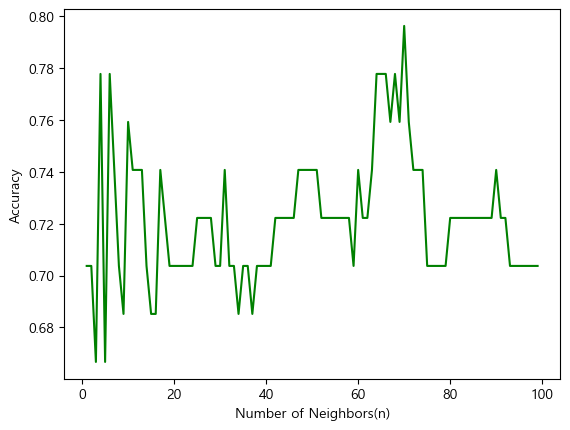

In [63]:
plt.plot(range(1,n) , acc , color = 'g')
plt.xlabel('Number of Neighbors(n)')
plt.ylabel('Accuracy')
plt.show()

- 그래프를 보니 , k가 70일 때 점수가 가장 높다.

In [64]:
knn = KNeighborsClassifier(n_neighbors = 70)

In [65]:
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=70)

In [66]:
knn.score(X_train , y_train)

0.6774193548387096

In [70]:
knn.score(X_test , y_test)

0.7962962962962963

- 이건 train 점수가 오히려 낮다.

In [7]:
def solution(arr):
    answer = []
    for i in range(len(arr)):
        answer.append(arr[i])
        if i>0:
            if arr[i] == arr[i-1]:
                answer.pop()
    return answer

In [8]:
solution([1,1,1,3,3,0,0,1,1])

[1, 3, 0, 1]

In [14]:
def solution(s):
    answer = ''
    for i in range(len(s)):
        if s[i] == ' ':
            continue
        elif i%2==0:
            s[i] = s[i].upper()
        else:
            s[i] = s[i].lower()
    return s

In [15]:
solution("try hello world")

TypeError: 'str' object does not support item assignment

In [16]:
'ab'.upper()

'AB'